Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)

diabetes_train


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 3, 8, 1, 13, 5, 3, 6, …
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 126, 99, 97,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 88, 84, 66, 82, 75…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 41, 0, 15, 19, 26, 11…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 235, 0, 140, 110, 0, 5…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 27, 50, 22, 57, 6…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,0
1,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
10,139,80,0,0,27.1,1.441,57,0
1,103,30,38,83,43.3,0.183,33,0
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:**

After 10 minute of analysis on the diabetes_train table, i've concluded that this question isn't a trick question so I will choose the ironic outcome columne as the suitable variable for the linear regression model.

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

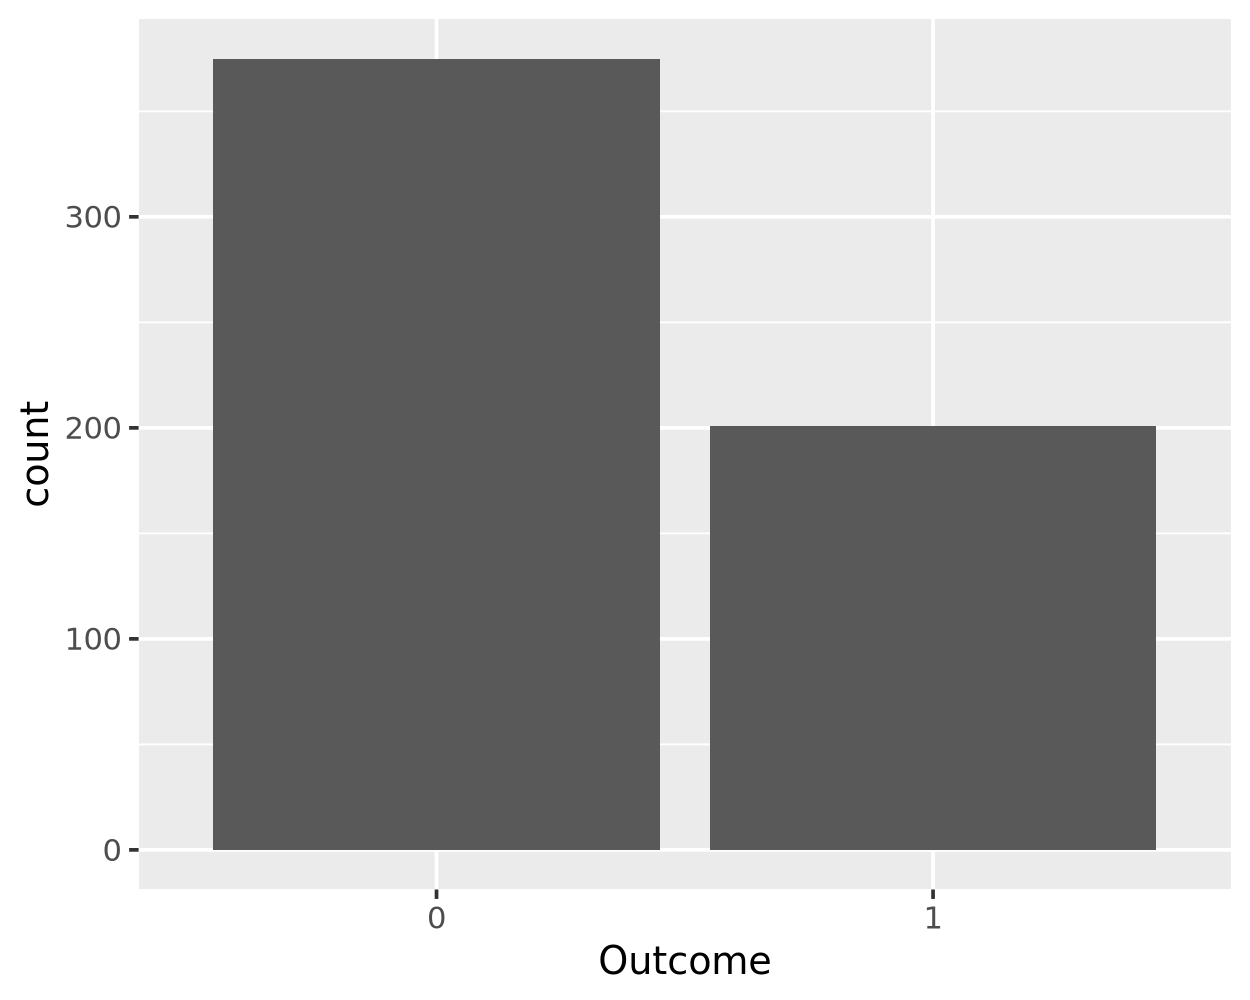

In [6]:
ggplot(data = diabetes_train, aes(x = Outcome)) +
  geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

That data isn't balanced as the ratio is 34.7 % of zeros to 65.28% of ones.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [23]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

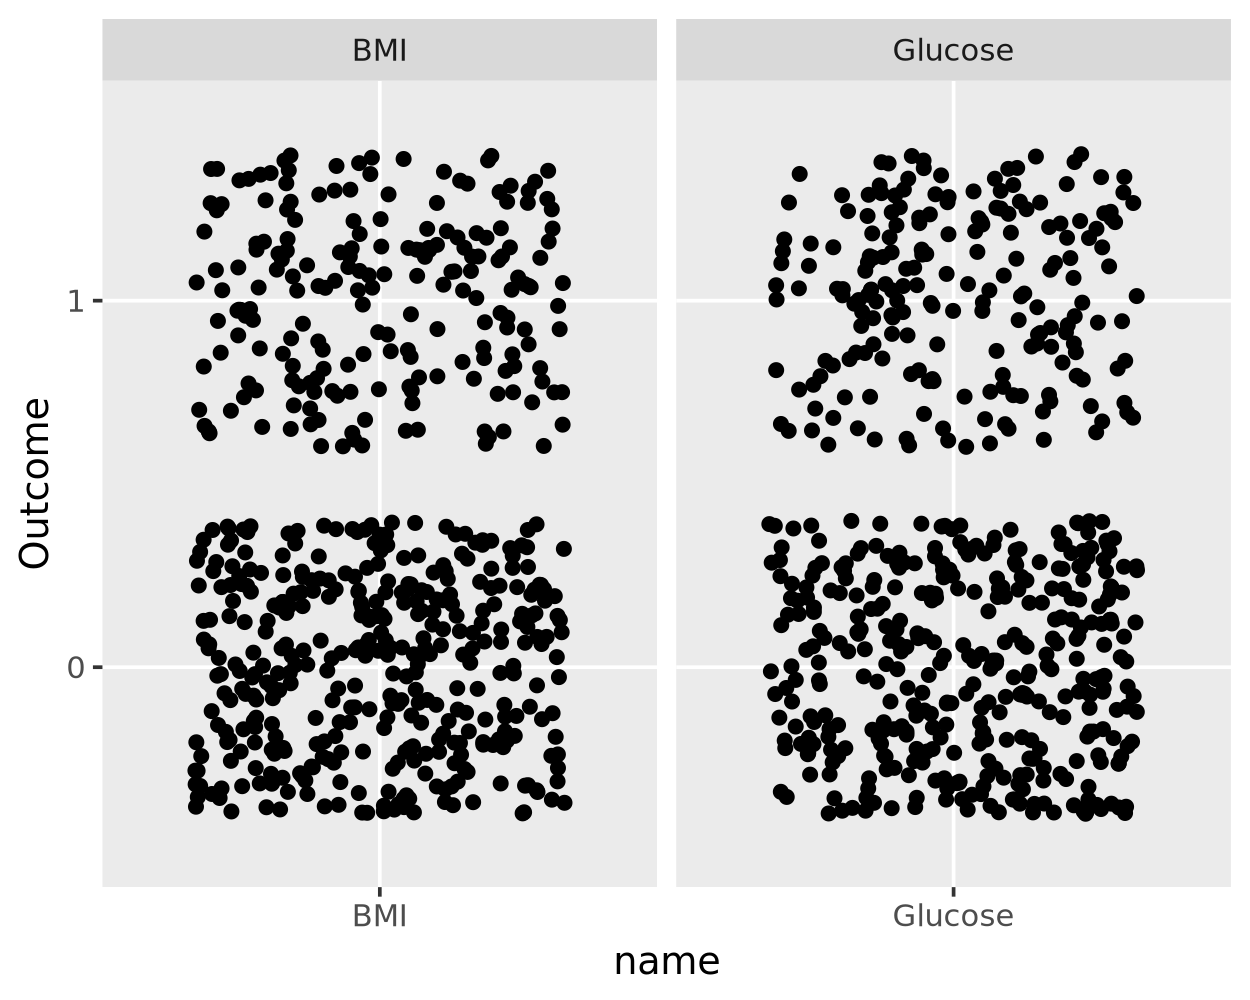

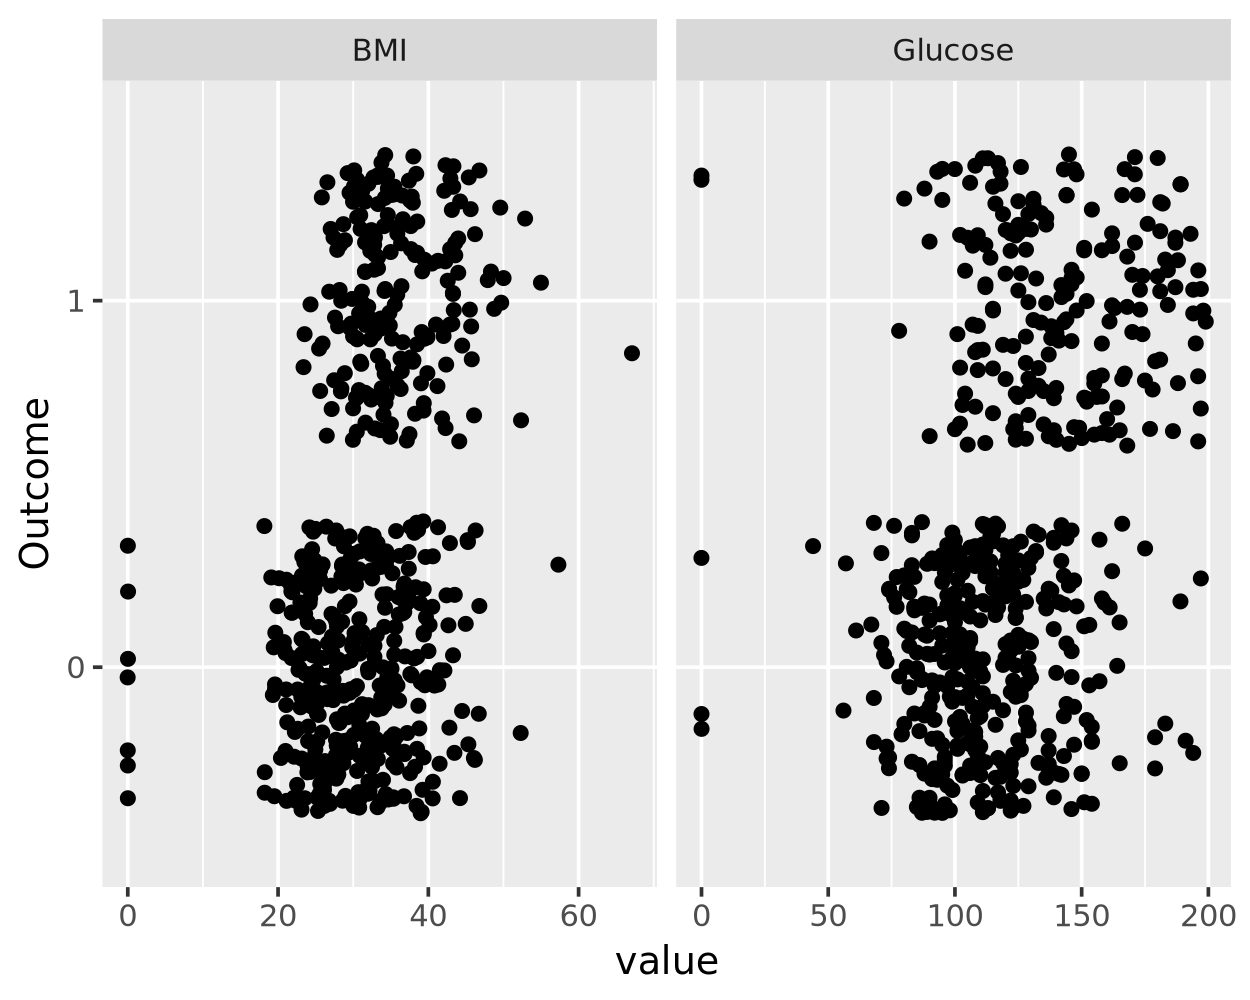

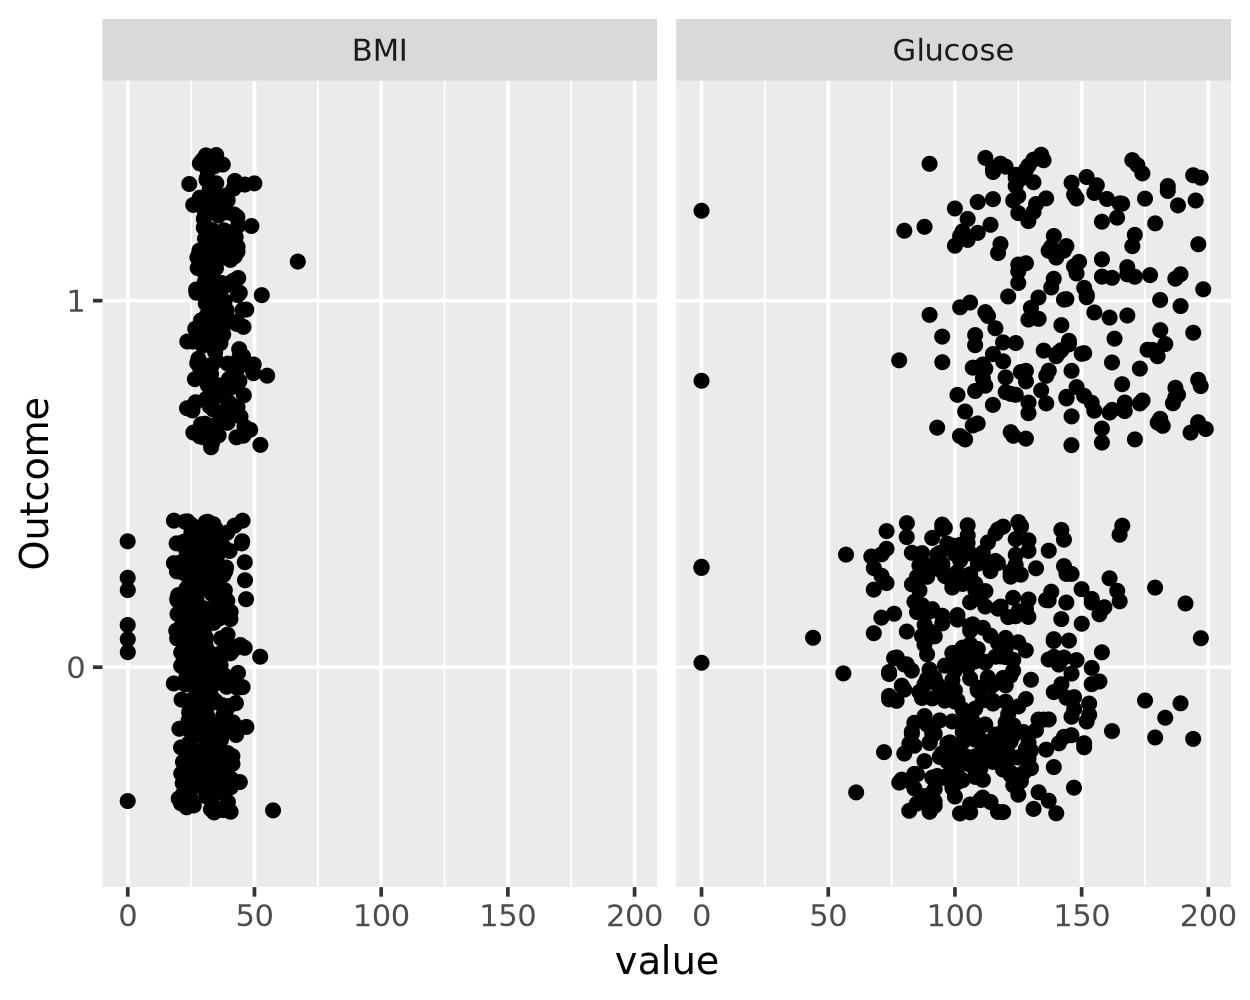

In [24]:
ggplot(data = plot_df, aes(x = name, y = Outcome)) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2, scales = 'free_x')

ggplot(data = plot_df, aes(x = value, y = Outcome)) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2, scales = 'free_x')

ggplot(data = plot_df, aes(x = value, y = Outcome)) +
  geom_jitter() +
  facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

It looks like when you remove the scales = 'free_x' argument from the facet_wrap function, the x-axis max value increases which make it difficult to visualize the linear regression model of the BMI plot.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [28]:
mod = logistic_reg() |> set_engine("glm")

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8.14320437,0.736408742,-11.057995,2.005294e-28
BMI,0.09793829,0.015847013,6.180237,6.400548e-10
Glucose,0.03413717,0.003840232,8.889350,6.146751e-19


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [26]:
diabeted_test_wPred =augment(mod_fit, diabetes_test)

glimpse(diabeted_test_wPred)

Rows: 192
Columns: 12
$ .pred_class              <fct> 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, …
$ .pred_0                  <dbl> 0.40471433, 0.97968871, 0.22154881, 0.7756807…
$ .pred_1                  <dbl> 0.595285671, 0.020311287, 0.778451191, 0.2243…
$ Pregnancies              <dbl> 8, 8, 1, 9, 5, 9, 3, 8, 2, 0, 2, 7, 5, 3, 15,…
$ Glucose                  <dbl> 183, 125, 189, 119, 117, 102, 180, 176, 84, 1…
$ BloodPressure            <dbl> 64, 96, 60, 80, 92, 76, 64, 90, 0, 88, 66, 78…
$ SkinThickness            <dbl> 0, 0, 23, 35, 0, 37, 25, 34, 0, 30, 20, 0, 33…
$ Insulin                  <dbl> 0, 0, 846, 0, 0, 0, 70, 300, 0, 0, 90, 0, 0, …
$ BMI                      <dbl> 23.3, 0.0, 30.1, 29.0, 34.1, 32.9, 34.0, 33.7…
$ DiabetesPedigreeFunction <dbl> 0.672, 0.232, 0.398, 0.263, 0.337, 0.665, 0.2…
$ Age                      <dbl> 32, 54, 59, 29, 38, 46, 26, 58, 21, 38, 28, 4…
$ Outcome                  <fct> 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [27]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 114  33
         1  11  34

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
    -33+34 = 67
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
    -11 + 34 = 45
- How many individuals predicted to have diabetes did not have diabetes?
    -11 individuals wer
**Answer:**